# Coupled harmonic oscillators

## Context

The dynamic of harmonic oscillators emerges in virtually every domain of physics, from the simple pendulum to wave propagation, and even within quantum field theory describing elementary particles together with their interactions. The only necessary datum about an oscillator is that its behavior is encoded in a single time-dependent variable (for example, the angular position of a pendulum or the vertical displacement of a mass suspended from a spring). In the following, this coordinate will be expressed as $r_i(t)$ for the $i^{th}$ oscillator, and $v_i(t)$ will denote the corresponding velocity, defined by $v_i(t) \equiv \mathrm{d}r_i/\mathrm{d}t$.

### Data format

For $N$ oscillators described for $n$ times values, the data to be analyzed are provided in the csv format with $2N+1$ columns and $n$ lines. The first column is the value of the time in second, the second column is the position of the first oscillator $r_1$, the third column is the velocity of the first oscillator $v_1$, etc ...

The first part of this code is dedicated to a system of two coupled oscillators while the second part focuses on a vibrating string dynamic. 

### Import packages and plot cosmetics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## First case: Two coupled oscillators

In [3]:
# loading the csv-file for the two oscillators as panda dataframe

df = pd.read_csv("./two_oscillators.csv")


# Exploration of first 5 values

df.head()

,time,r1,v1,r2,v2
0,0.00000,-0.200000,0.000000,0.500000,0.000000
1,0.40016,-0.195610,0.021870,0.492415,-0.037805
2,0.80032,-0.182607,0.042915,0.469912,-0.074355
3,1.20048,-0.161481,0.062338,0.433237,-0.108439
4,1.60064,-0.133031,0.079404,0.383606,-0.138930


## Analysis of Oscillators 
-Initial condition of the system.

-Plot the evolution of $r_1(t)$ and $r_2(t)$ with time. 

-Period of the oscillations.

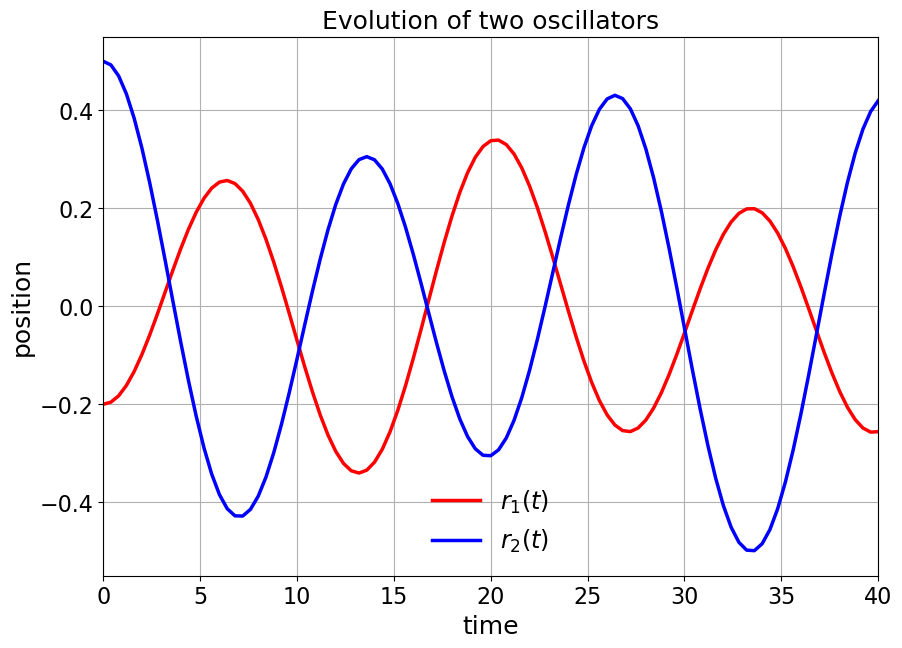

In [4]:
# Plot evolution of the position in time for both oscillators

plt.title("Evolution of two oscillators")
plt.plot(df["time"], df["r1"], color = "red", label = "$r_1(t)$")
plt.plot(df["time"], df["r2"], color = "blue", label = "$r_2(t)$")
plt.xlabel("time")
plt.xlim(0,40)   # adjusting the range on x
plt.ylabel("position")
plt.grid()
plt.legend()


# Save fig

plt.savefig("two_oscillators_evolution.png", dpi=300)

Computing the velocity of the first oscillator *from its position only*. As a reminder the *numerical derivative* of a quantity $x$ known for discrete time values is defined as 
$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{x(t_j) - x(t_{j-1})}{t_{j} - t_{j-1}}
$$
(this corresponds to the estimation of the derivated at $t = (t_{j} + t_{j-1}) / 2$

For this step we must manipulate directly a numpy array (and not dataframe column). To do so, we can use the following syntax: `array_myVar = df.myVar.values`, where `myVar` is the name of a dataframe column

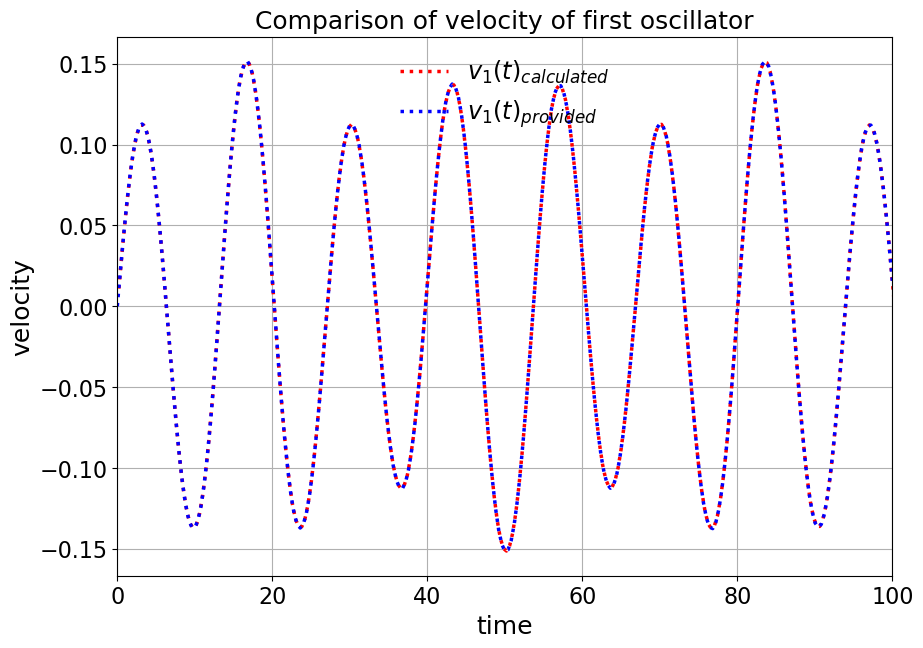

In [5]:
# Adjusting the correspondig variables to numpy arrays

t = df.time.values    
x1 = df.r1.values
x2 = df.r2.values


# Calculting the velocity

dx1 = x1[1:] - x1[:-1]
dx2 = x2[1:] - x2[:-1]
dt = t[1:] - t[:-1]

v1 = dx1 / dt
v2 = dx2 / dt

t = ( t[1:] + t[:-1] ) / 2  # time


# Plotting the obtained and the provided velocity versus time

plt.title("Comparison of velocity of first oscillator")
plt.plot(t , v1 , color = "red", label = "$v_1(t)_{calculated}$", linestyle = "dotted")
plt.plot(df["time"], df["v1"], color = "blue", label = "$v_1(t)_{provided}$", linestyle = "dotted" )
plt.xlabel("time")
plt.xlim(0,100)   # adjusting the range on x
plt.ylabel("velocity")
plt.grid()
plt.legend(loc="upper center")

We want to check whether the motion of each oscillator is symetric with respect to its rest position $r_i=0$, by computing four corresponding position and velocities means (positive and negative position/velocity).

In [6]:
# Masks for the positive values of position and velocity

x1_pos = df.r1 > 0
x2_pos = df.r2 > 0
v1_pos = df.v1 > 0 
v2_pos = df.v2 > 0 


#Printing the mean using the masks

print(
    f"The means for System 1: \n"
    f"    <x_pos> = {df.r1[x1_pos].mean():.5f} \n"
    f"    <x_neg> = {df.r1[~x1_pos].mean():.5f} \n"
    f"    <v_pos> = {df.v1[v1_pos].mean():.5f} \n"
    f"    <v_neg> = {df.v1[~v1_pos].mean():.5f} \n"
)

print(
    f"The means for System 2: \n"
    f"    <x_pos> = {df.r2[x2_pos].mean():.5f} \n"
    f"    <x_neg> = {df.r2[~x2_pos].mean():.5f} \n"
    f"    <v_pos> = {df.v2[v2_pos].mean():.5f} \n"
    f"    <v_neg> = {df.v2[~v2_pos].mean():.5f} \n"
)

The means for System 1: 
    <x_pos> = 0.17980 
    <x_neg> = -0.17950 
    <v_pos> = 0.08334 
    <v_neg> = -0.08339 

The means for System 2: 
    <x_pos> = 0.25356 
    <x_neg> = -0.25405 
    <v_pos> = 0.11733 
    <v_neg> = -0.11843 



Plotting the distribution of the position of each oscillator when the velocity is below and above 50% of the maximum velocity (in absolute value).

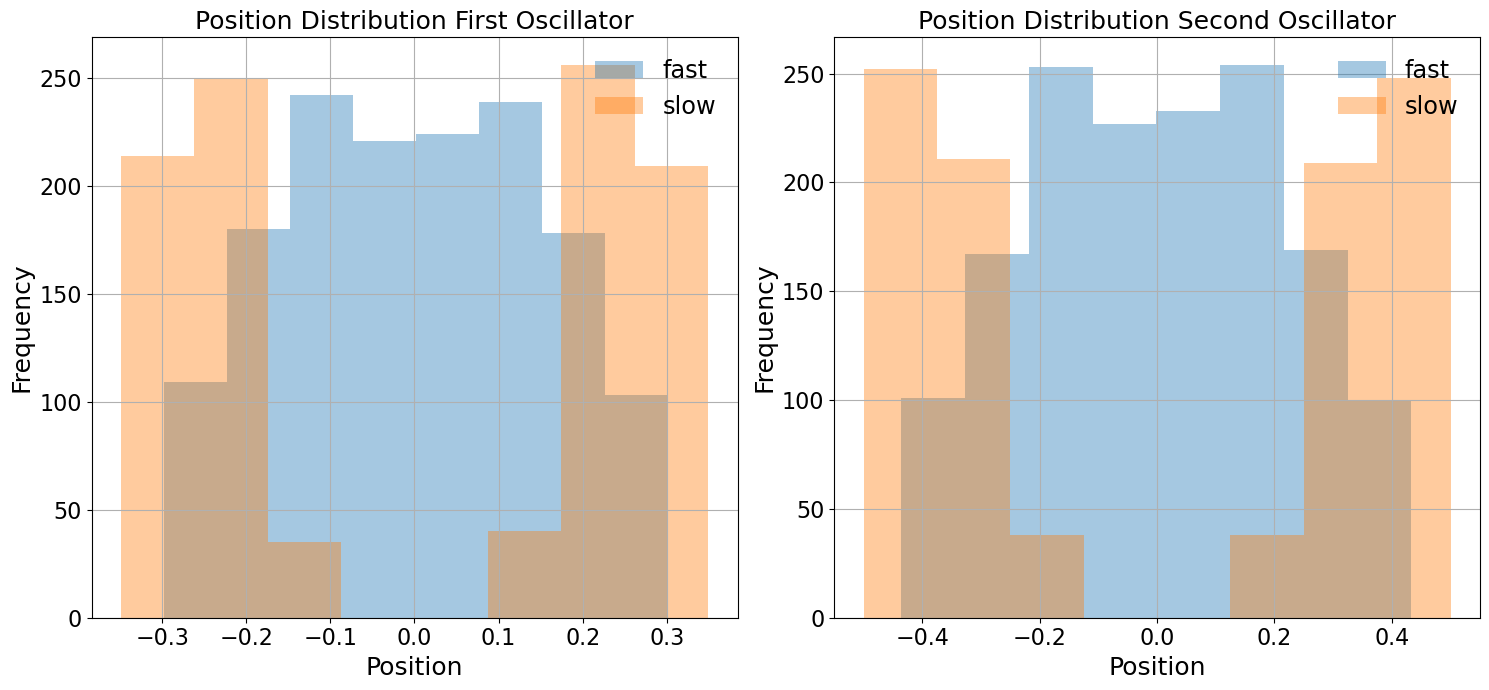

In [7]:
# Defyning masks for the velocity
v1_max = np.max(df["v1"])  # maximum value of velocity
v1_mask_above = abs(df.v1.values) > v1_max/2

v2_max = np.max(df["v2"])
v2_mask_above = abs(df.v2.values) > v2_max / 2


# one figure per oscillator
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title("Position Distribution First Oscillator")
plt.hist(df["r1"][v1_mask_above], bins = 8, label = "fast", alpha = 0.4)
plt.hist(df["r1"][~v1_mask_above], bins = 8, label = "slow", alpha = 0.4)
plt.ylabel("Frequency")
plt.xlabel("Position")
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
plt.title("Position Distribution Second Oscillator")
plt.hist(df["r2"][v2_mask_above == True], bins = 8, label = "fast", alpha = 0.4)
plt.hist(df["r2"][v2_mask_above == False], bins = 8, label = "slow", alpha = 0.4)
plt.ylabel("Frequency")
plt.xlabel("Position")
plt.grid()
plt.legend()
plt.tight_layout()


# Saving fig
plt.savefig("two_oscillators_position_dist.png", dpi=300)

## Phase diagram

Plotting the "phase diagram", *i.e.*, the velocity *versus* the position. 
It is useful to display the time values, in order to have an idea of the motion within the sphase space.

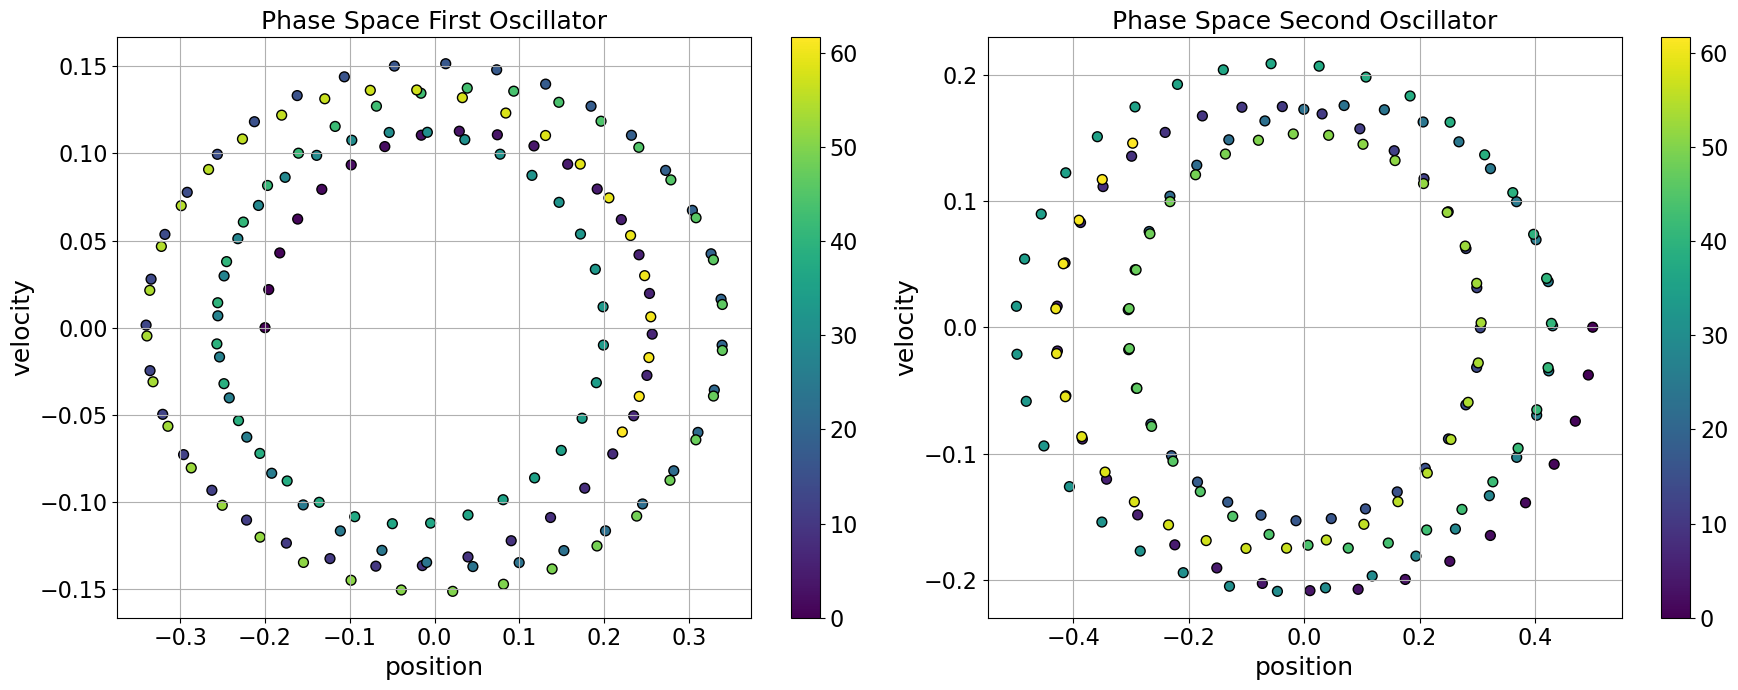

In [9]:
# Time taking into account

ok = df.time < 62


# Phase Space plot

plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
plt.title("Phase Space First Oscillator")
plt.scatter(x=df.r1[ok], y=df.v1[ok], c=df.time[ok], s = 50, marker = "o", edgecolors = "black")
plt.xlabel("position")
plt.ylabel("velocity")
plt.grid()
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Phase Space Second Oscillator")
plt.scatter(x=df.r2[ok], y=df.v2[ok], c=df.time[ok], s = 50, marker = "o", edgecolors = "black")
plt.xlabel("position")
plt.ylabel("velocity")
plt.grid()
plt.colorbar()

plt.tight_layout()


#Saving Figure
plt.savefig("two_oscillators_phase_space.png", dpi = 300)

## Second case: N coupled oscillators (Vibrating string) 

We assuming that each oscillator moves along the y direction, *i.e* $r_i(t) = y_i(t)$, but has a fixed position along the x direction. To simplify, we choose the x value of the $i^{th}$ oscillator to be $x_i = i$. This system describes then an horizontal string vibrating in one dimension.

In [10]:
# Loading the cvs file of n oscillators as panda df
df2 = pd.read_csv("./n_oscillators.csv")


# Printing properties
rows = df2.shape[0]
columns = df2.shape[1]
number_oscillators = int((df2.shape[1]-1)/2)

print("The dimension of the data is ", df2.shape)
print(f"The number of time values is {rows}")
print("The number of oscillators is", number_oscillators )


# Fisrt 5 rows
df2.head()

The dimension of the data is  (2500, 401)
The number of time values is 2500
The number of oscillators is 200


,time,r1,v1,r2,v2,r3,v3,r4,v4,r5,...,r196,v196,r197,v197,r198,v198,r199,v199,r200,v200
0,0.00000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000e+00,0.5,0.000000e+00,0.5,...,0.5,0.000000e+00,0.5,0.000000e+00,0.500000,0.000000e+00,0.500000,0.000000,0.500000,0.000000
1,0.40016,0.496007,-0.019901,0.499995,-0.000053,0.500000,-4.290844e-08,0.5,-1.687418e-11,0.5,...,0.5,-3.726124e-15,0.5,-1.687418e-11,0.500000,-4.290844e-08,0.499995,-0.000053,0.496007,-0.019901
2,0.80032,0.484157,-0.039168,0.499915,-0.000422,0.500000,-1.356618e-06,0.5,-2.100152e-09,0.5,...,0.5,-1.935600e-12,0.5,-2.100152e-09,0.500000,-1.356618e-06,0.499915,-0.000422,0.484157,-0.039168
3,1.20048,0.464826,-0.057192,0.499576,-0.001401,0.499998,-1.017640e-05,0.5,-3.521921e-08,0.5,...,0.5,-7.117101e-11,0.5,-3.521921e-08,0.499998,-1.017640e-05,0.499576,-0.001401,0.464826,-0.057192
4,1.60064,0.438626,-0.073412,0.498678,-0.003246,0.499989,-4.219920e-05,0.5,-2.599168e-07,0.5,...,0.5,-9.348120e-10,0.5,-2.599168e-07,0.499989,-4.219920e-05,0.498678,-0.003246,0.438626,-0.073412


Computing the average and standard deviation of the y-position for each oscillator.

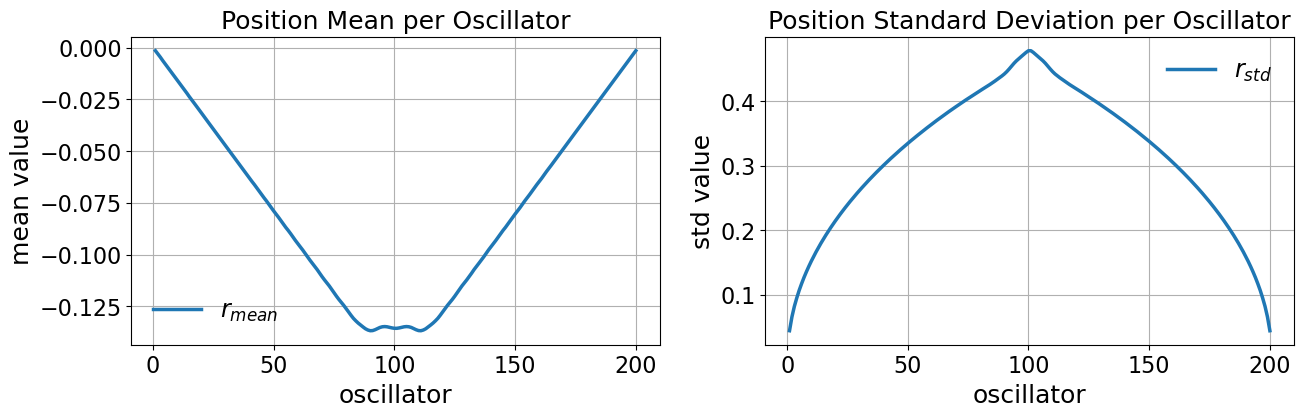

In [11]:
# Calculating average and std of position for each oscillator

position_means = []  #empty arrays for mean
position_stds = []   #empty array for std
position = []


# loop over the oscillators
for i in range(number_oscillators):

    position_means.append( df2[f"r{i+1}"].mean() )
    position_stds.append( df2[f"r{i+1}"].std() )
    position.append(i+1)
    
    
# Plot 
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
plt.title("Position Mean per Oscillator")
plt.plot(position, position_means, label = "$r_{mean}$")
plt.grid
plt.xlabel("oscillator")
plt.ylabel("mean value")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.title("Position Standard Deviation per Oscillator")
plt.plot(position, position_stds, label = "$r_{std}$")
plt.grid
plt.xlabel("oscillator")
plt.ylabel("std value")
plt.grid()
plt.legend()


# Saving fig
plt.savefig("n_oscillators_position_mean_std.png", dpi=300)

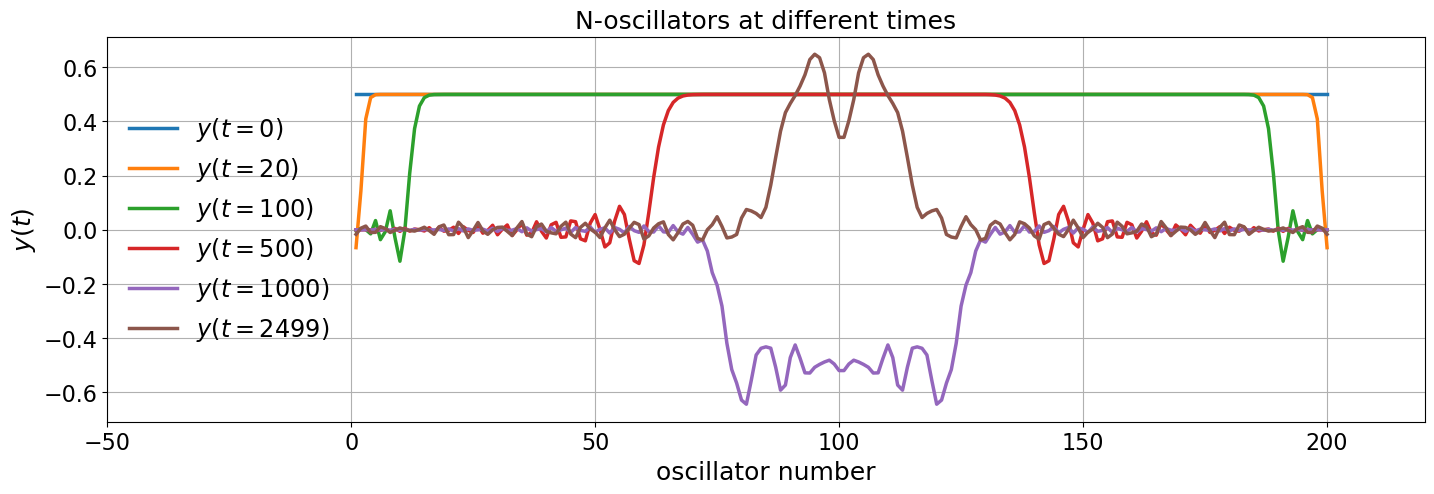

In [12]:
#Creating new dataframe with the positions only

df2_positions = df2.filter(regex = "^r")  # only the ones that initiate with r
times = [0, 20, 100, 500 , 1000, 2499] # times ti to plot y(ti)


# Plotting the y(t) string

plt.figure(figsize=(17,5))
plt.title("N-oscillators at different times")
for time in times:
    plt.plot(position, df2_positions.iloc[time], label = f"$y(t = {time})$")

plt.xlim(-50, 220);
plt.xlabel("oscillator number")
plt.ylabel("$y(t)$")
plt.grid()
plt.legend(loc = "center left")

#Saving fig

plt.savefig("n_oscillators_different_times.png", dpi=300)